###### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course. 

In [2]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.

# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

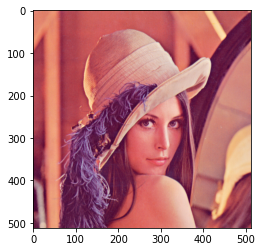

In [3]:
image = plt.imread("lena.png")
plt.imshow(image)

# 1. Image Information

###### Task1.1 : write code to find image dimension and print it

In [4]:
shape = image.shape
print(shape)

(512, 512, 3)


In [6]:
#It is rgb as it has 3 different channels

###### Task1.2:  Visualization of each channel

In [7]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    #write your code here 
    output = plt.imshow(image[:,:,channel])
    
    
    return output    # 'output' is image's particular channel values 

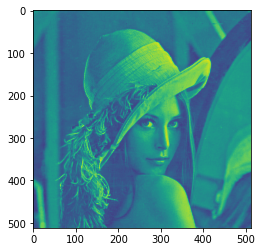

In [8]:
VisualizeChannel(image, 2)

# 2. Intensity Manipulations

###### Task2.1: RGB to Gray  

array([[0.6367843 , 0.6367843 , 0.6367059 , ..., 0.66564703, 0.6082353 ,
        0.5031765 ],
       [0.6367843 , 0.6367843 , 0.6367059 , ..., 0.66564703, 0.6082353 ,
        0.5031765 ],
       [0.6367843 , 0.6367843 , 0.6367059 , ..., 0.66564703, 0.6082353 ,
        0.5031765 ],
       ...,
       [0.16635294, 0.16635294, 0.1957255 , ..., 0.4086667 , 0.3924706 ,
        0.38576472],
       [0.1719608 , 0.1719608 , 0.21372549, ..., 0.40662748, 0.41215685,
        0.42380393],
       [0.1719608 , 0.1719608 , 0.21372549, ..., 0.40662748, 0.41215685,
        0.42380393]], dtype=float32)

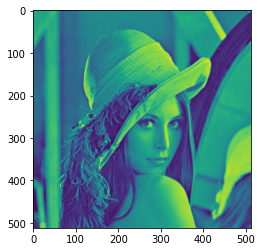

In [19]:
def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result 
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    gray = (0.3 * R) + (0.59 * G) + (0.11 * B) 
    plt.imshow(gray)
    return gray       #'gray' is grayscale image, converted from RGB image
RGB2Gray(image)

###### Task2.2 : Gray to Binary

In [10]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above. 
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''
    
    #check if image is RGB if yes, convert it to gray 
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        im = RGB2Gray(image)
    else:
        im = image
        
        
    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    bimg = (im > T)*1
    
    #write code to visualize the resultant image
    
    
    return bimg
    

In [11]:
Gray2Binary(image, 0.5)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

######  Task2.3:  Crop a 5*5 section of a gray image

In [12]:
def ImageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5) 
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # write code to check if input is RGB , if its RGB convert it to gray
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        im = RGB2Gray(image)
    else:
        im = image
    r1 = 5+r0
    c1 = 5+c0
    # write code to select 5*5 rectangular patch defined as above (say it 'patch')
    patch = im[r0:r1, c0:c1]
    
    # visualize patch and print its value
    plt.imshow(patch)
    
    
    return patch

[[0.59270585 0.6067451  0.6298431  0.6222353  0.61941177]
 [0.61560786 0.5977255  0.6153726  0.63145095 0.6167059 ]
 [0.60992163 0.60560787 0.6067059  0.61670595 0.6161961 ]
 [0.6110197  0.6105099  0.608353   0.62654907 0.6178039 ]
 [0.61686283 0.6239608  0.6158039  0.6363922  0.64035296]]


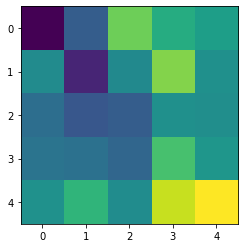

In [15]:
r0 = 20
c0 = 25
patch = ImageCrop(image,r0,c0)
print(patch)
plt.imshow(patch*0.5)

###### Task2.4: Uniform Brightness Scaling

In [17]:
def UniformBrightScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    #write your code here 
    flag = len(image.shape)
    if flag == 3:
      image = RGB2Gray(image)
    output = image*scale
    
    #display the resultant image
    plt.imshow(output)
    
    return output        #replace output with the variable name you used for final result
    

array([[0.31839216, 0.31839216, 0.31835294, ..., 0.33282351, 0.30411765,
        0.25158826],
       [0.31839216, 0.31839216, 0.31835294, ..., 0.33282351, 0.30411765,
        0.25158826],
       [0.31839216, 0.31839216, 0.31835294, ..., 0.33282351, 0.30411765,
        0.25158826],
       ...,
       [0.08317647, 0.08317647, 0.09786275, ..., 0.20433335, 0.1962353 ,
        0.19288236],
       [0.0859804 , 0.0859804 , 0.10686275, ..., 0.20331374, 0.20607843,
        0.21190196],
       [0.0859804 , 0.0859804 , 0.10686275, ..., 0.20331374, 0.20607843,
        0.21190196]], dtype=float32)

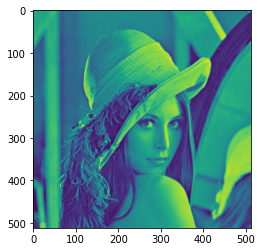

In [18]:
UniformBrightScaling(image, 0.5)

# 3. Image Filtering

In [20]:
def feature_extractor(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here. 
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''
    # first convert RGB to gray if input is RGB image
    
    l = len(image.shape)
    
    if l == 3:
        #write code to convert it to gray scale
        image = RGB2Gray(image)
    # write code to create a zero array of size (r,c) which will store the resultant value at specific pixel locations (say it output)
    arr = np.zeros((r,c))

        
    #write code to create a zero array with size (r+2,c+2) if (r,c) is the gray image size.  (say it pad_img)
    arr1 = np.zeros((r+2,g+2))
    
    #now copy gray image to above created array at location starting from (1,1)
    arr = image[1:(r+1), 1:(c+1)].copy()
    out = []
    #write code to convolve the image 
    for row in range(1,r+1):     # use appropiate range values for row and col
        for col in range(1,c+1):
            # select 3*3 patch with center at (row,col), flatten it. flatten the kernel and take dot product between both (or directly take element wise multiplication and sum it)
            # store this scalar value to output matrix with starting location (0,0)         (alternatively one could also create a list and reshape it to output size)
            patch = arr[row-1:row+1, col-1:col+1]
            patch = patch.flatten()
            kernel = kernel.flatten()
            res = np.dot(patch, kernel)
            out.append(res)
            
            
    return out

In [21]:
## Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all 
 #of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

# 4.Geometric Transformation

###### Task4.1: Image Rotation (In-plane)

# 5. Solution of a system of equation 

###### Task5.1: Least square error

In [ ]:
def LeastSqSoln(A,b):
    '''
    Ax = b
    Convert the system of equations in form Ax = b
    '''
    # write your code here to find x'
    
    
    # if the exect solution were (1,1), write code to find square error (L2 norm)
    
    
    
    return x', error 